<a href="https://colab.research.google.com/github/bhawanahaha/ClassificationTask/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: BHAWANA THAPA

UNIVERSITY ID: 2438424

GROUP: L5CG4

 **Introduction to the Covid-19 Dataset**

This dataset provides a comprehensive overview of COVID-19 statistics for 187 countries. It ncludes key metrices such as Confirmed cases, Deaths, Recovered cases and Active cases. Each country is assigned to a specific WHO region, helping in geographical analysis. It allows for the study of mortality rates, recovery trends, and active case progression. It help researchers and policymakers understand the spread and impact of the virus globally.Overall, this dataset is valuable for tracking COVID-19 trends and regional health responses. And it is actually accessed from kaggle, https://www.kaggle.com/datasets/imdevskp/corona-virus-report

Mount Files and Necessary Libraries

In [1]:
#Mount the Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

**Exploratory Data Analysis and Data Understanding**

**1. Choosing a Dataset**

**Dataset Name: Country-wise COVID-19 Latest Statistics**

a. When and by whom was the dataset created?

b. How did you access the dataset?

c. How does it align with the chosen UNSDG? This dataset aligns with UNSDG Goal 3: Good Health and Well-being, which aims to ensure healthy lives and promote well-being for all at all ages.

d. List of attributes (columns) in the dataset:

1. Country/Region – Name of the country or region
2. Confirmed – Total confirmed COVID-19 cases
3. Deaths – Total deaths due to COVID-19
4. Recovered – Total recovered cases
5. Active – Active cases currently
6. New cases – New confirmed cases on the latest day
7. New deaths – New reported deaths on the latest day
8. New recovered – New recovered cases on the latest day
9. Deaths / 100 Cases – Death rate per 100 confirmed cases
10. Recovered / 100 Cases – Recovery rate per 100 confirmed cases
11. Deaths / 100 Recovered – Deaths per 100 recovered patients
12. Confirmed last week – Confirmed cases a week ago
13. 1 week change – Change in confirmed cases over the past week
14. 1 week % increase – Percentage increase in cases over the past week
15. WHO Region – WHO region classification of the country

Potential Questions the Dataset Can Help Answer:
* How does a change in the independent variables affect the target varibale?
* How can the model's predections be used for decision-making or optimization?
* What impact does feature selection have on the regression model's performance?



Accessing the Dataswt's Suitability for Analysis

* Completeness: The dataset contains 187 countries with no missing values, making it well-structured.
* Relevance: It provides key pandemic insights aligned with public health analysis and decision-making Quality-The numerical data appers accurate, but source verification is necessary for reliability.

# Inspect the data

In [3]:
#Read the csv file into the dataframe using Pandas
df = pd.read_csv('/content/drive/MyDrive/Assesment/country_wise_latest.csv')

1. What is the total size of the data frame?

In [4]:
#Calculate the size of the Dataframe using the 'shape' attribute and store it in the 'data_size' variable

data_size = df.shape
print("Number of rows:", data_size[0])
print("Number of columns:", data_size[1])


Number of rows: 187
Number of columns: 15


In [5]:
#Using info() method to print information of dataset like number of columns, rows, label, column datatypes etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

2. What type of data is each variable?

In [6]:
#Retrive the datatypes of each variable in the Dataframe using the 'dtypes' function
print("The datatypes of each variable is:")
df.dtypes

The datatypes of each variable is:


,0
Country/Region,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
Deaths / 100 Cases,float64
Recovered / 100 Cases,float64


3. Do any variable have missing values? Why might that be?

In [7]:
#Discover and count the missing values for each variable in column of the DataFrame using the isnull() method
missing_values = df.isnull().sum()
print("Missing values for each variable:\n")
print(missing_values)

Missing values for each variable:

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


# Summary Statistics


For Numeric Column:

Spearating numeric dtypes data from df



In [8]:
# 'df' is your DataFrame

# Separate columns into numerical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create separate DataFrames for numerical
df_numerical = df[numerical_columns]

#Print the numerical dataset
df_numerical




,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07
3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60
4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12
183,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00
184,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45
185,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86


For Categorical Column:

In [9]:
# Separate columns into categorical
categorical_columns = df.select_dtypes(include=['object']).columns

# Create separate DataFrames for categorical
df_categorical = df[categorical_columns]

#Print the categorical dataset
df_categorical

,Country/Region,WHO Region
0,Afghanistan,Eastern Mediterranean
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
182,West Bank and Gaza,Eastern Mediterranean
183,Western Sahara,Africa
184,Yemen,Eastern Mediterranean
185,Zambia,Africa


1. Use descriptive function to gather basic statistical information about the variables such as: min, max, range, mean, variance, standard deviation.

In [10]:

# Basic statistical information
basic_stats = df_numerical.describe()
basic_stats





,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [11]:
# Drop the specific column
df_cleaned = df_numerical.drop(columns=["Deaths / 100 Recovered"])
df_cleaned



,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase
0,36263,1269,25198,9796,106,10,18,3.50,69.49,35526,737,2.07
1,4880,144,2745,1991,117,6,63,2.95,56.25,4171,709,17.00
2,27973,1163,18837,7973,616,8,749,4.16,67.34,23691,4282,18.07
3,907,52,803,52,10,0,0,5.73,88.53,884,23,2.60
4,950,41,242,667,18,1,0,4.32,25.47,749,201,26.84
...,...,...,...,...,...,...,...,...,...,...,...,...
182,10621,78,3752,6791,152,2,0,0.73,35.33,8916,1705,19.12
183,10,1,8,1,0,0,0,10.00,80.00,10,0,0.00
184,1691,483,833,375,10,4,36,28.56,49.26,1619,72,4.45
185,4552,140,2815,1597,71,1,465,3.08,61.84,3326,1226,36.86


Exploratory Data Analysis (EDA) in python

Visualization

In [12]:
correlation_matrix = df_cleaned.corr()
print(correlation_matrix['Deaths'].sort_values(ascending=False))


Deaths                   1.000000
Confirmed last week      0.939082
Confirmed                0.934698
Active                   0.871586
1 week change            0.855330
Recovered                0.832098
New deaths               0.814161
New cases                0.806975
New recovered            0.765114
Deaths / 100 Cases       0.251565
1 week % increase       -0.034708
Recovered / 100 Cases   -0.114529
Name: Deaths, dtype: float64


# Visualization

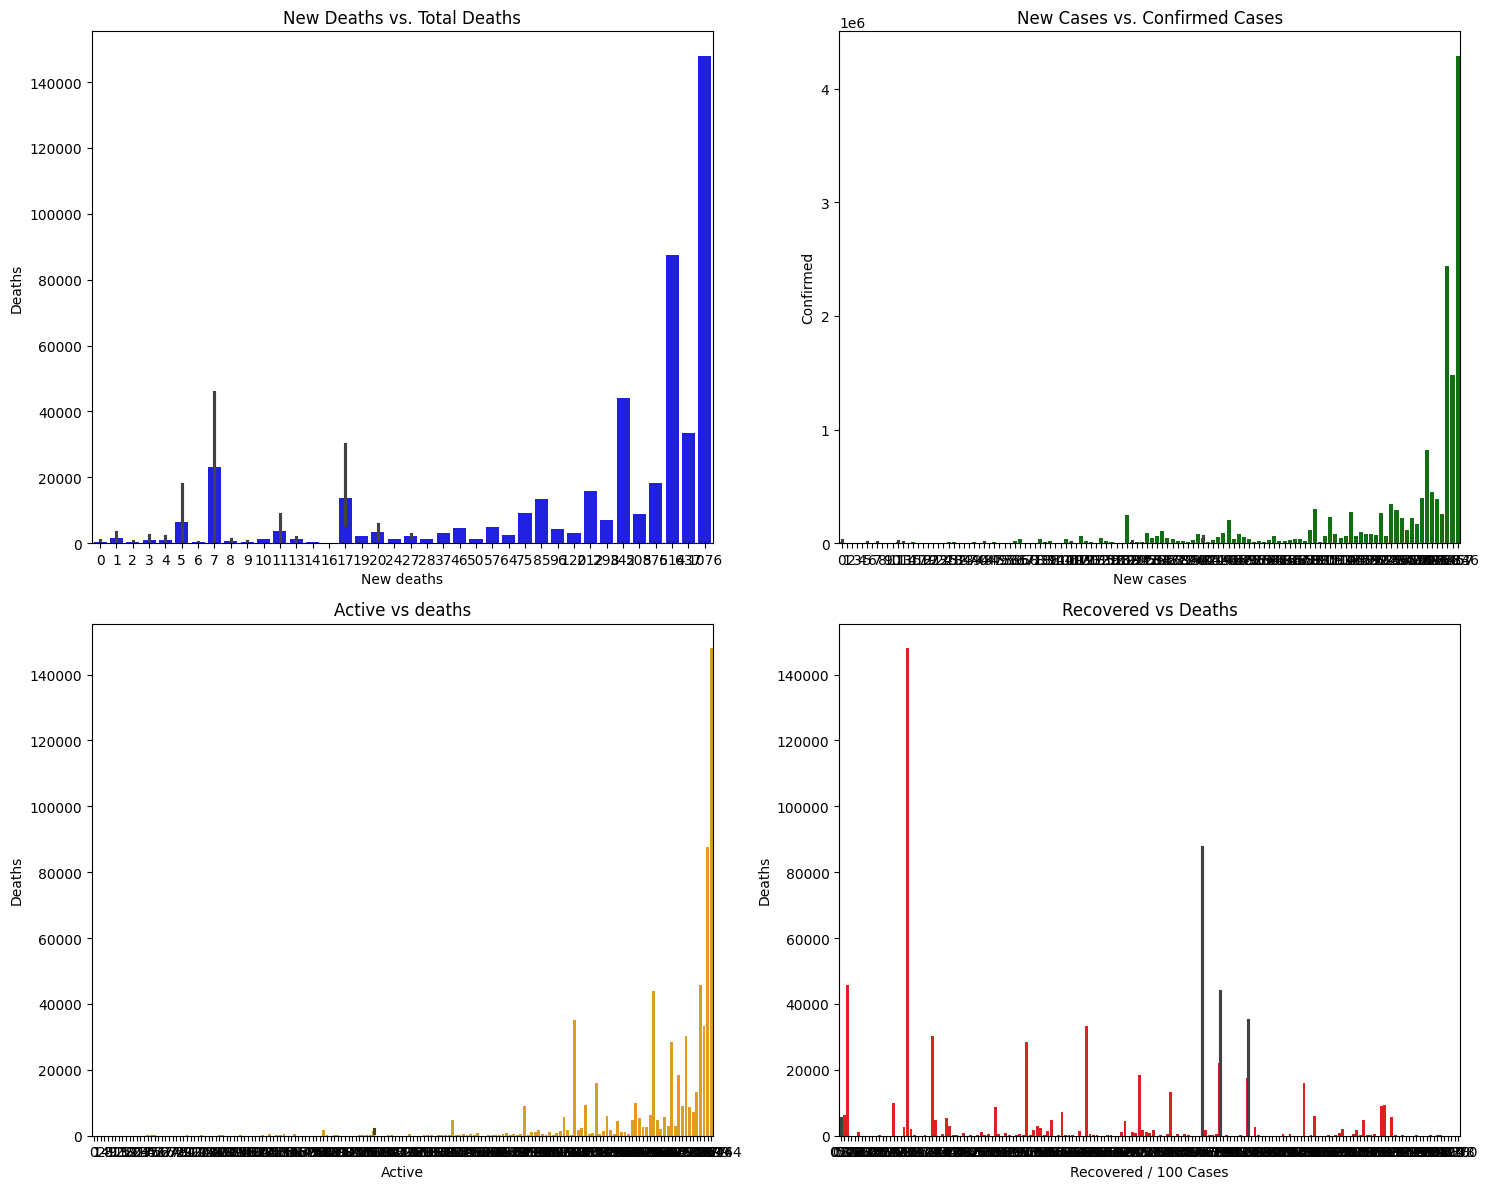

In [13]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: New Deaths vs. Total Deaths
sns.barplot(x='New deaths', y='Deaths', data=df_cleaned, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('New Deaths vs. Total Deaths')

# Plot 2: New Cases vs. Total Cases
sns.barplot(x='New cases', y='Confirmed', data=df_cleaned, color='green', ax=axes[0, 1])
axes[0, 1].set_title('New Cases vs. Confirmed Cases')

sns.barplot(x='Active', y='Deaths', data=df_cleaned, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Active vs deaths')

sns.barplot(x='Recovered / 100 Cases', y='Deaths', data=df_cleaned, color='red', ax=axes[1, 1])
axes[1, 1].set_title('Recovered vs Deaths')
plt.tight_layout()
plt.show()


Confirmed vs Deaths (0.934698)

High positive correlation (~0.93).
As the number of confirmed cases increases, deaths also tend to increase.
This makes sense because more infections lead to more fatalities.

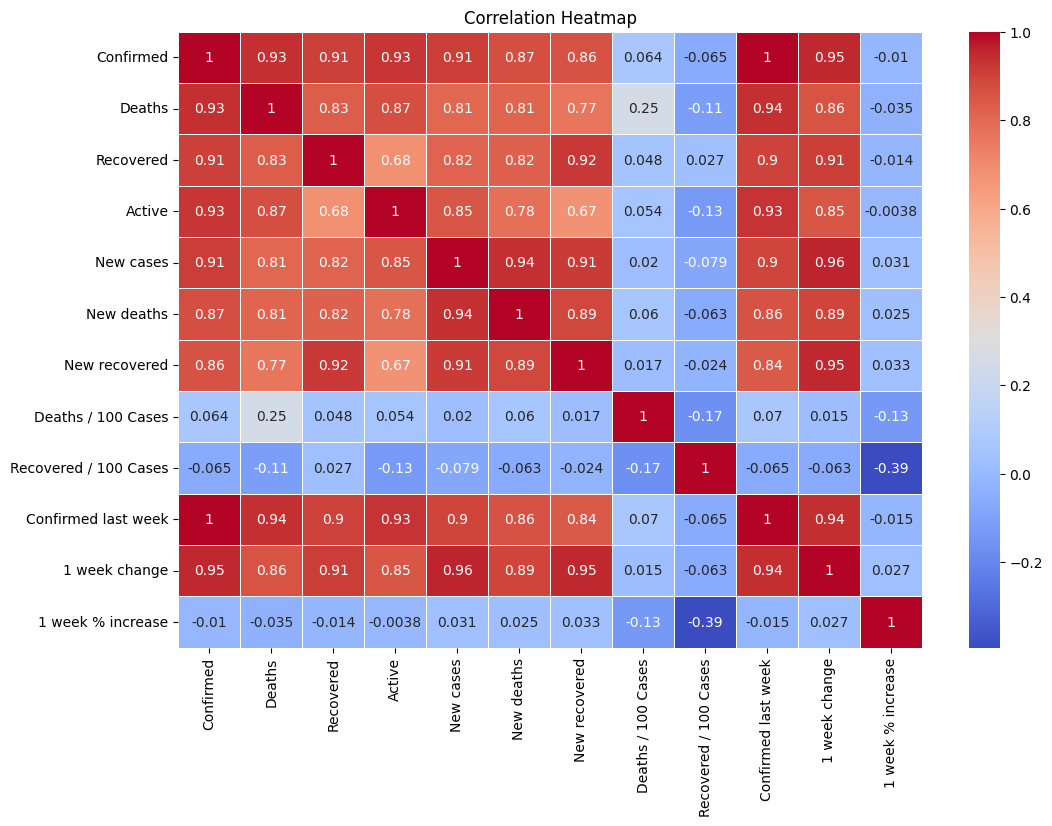

In [14]:
# Heatmap (Shows correlations between features)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

This figure is a correlation heatmap showing the relationship between differenct COVID-19 related features. The values in the heatmap represent the Pearson correlation coefficient(r), which measures the strength and direction of a linear relationship between two variables. Range of Correlation Coefficients(r):

r = 1.00, Perfect positive correaltion (as one variable increases, the other decreaes).

r = -1.00, Perfect negative correlation (as one variable increases, the other decreases).

r = 0.00, No correlation.

For example, The number of confirmed cases is highly correlated with the number of deaths(0.93). This make sense because higher infection typically lead more fatalities. As we see, there is a weak negative correlation between 'Recovery Rate' and 'Death Rate' meaning that as recovery rates increases, the death rate slightly decreases, which is expected. Strong clusters of correalted features are confirmed cases, deaths,recoveries, and active cases. For building a predictive model we can use highly correlated features

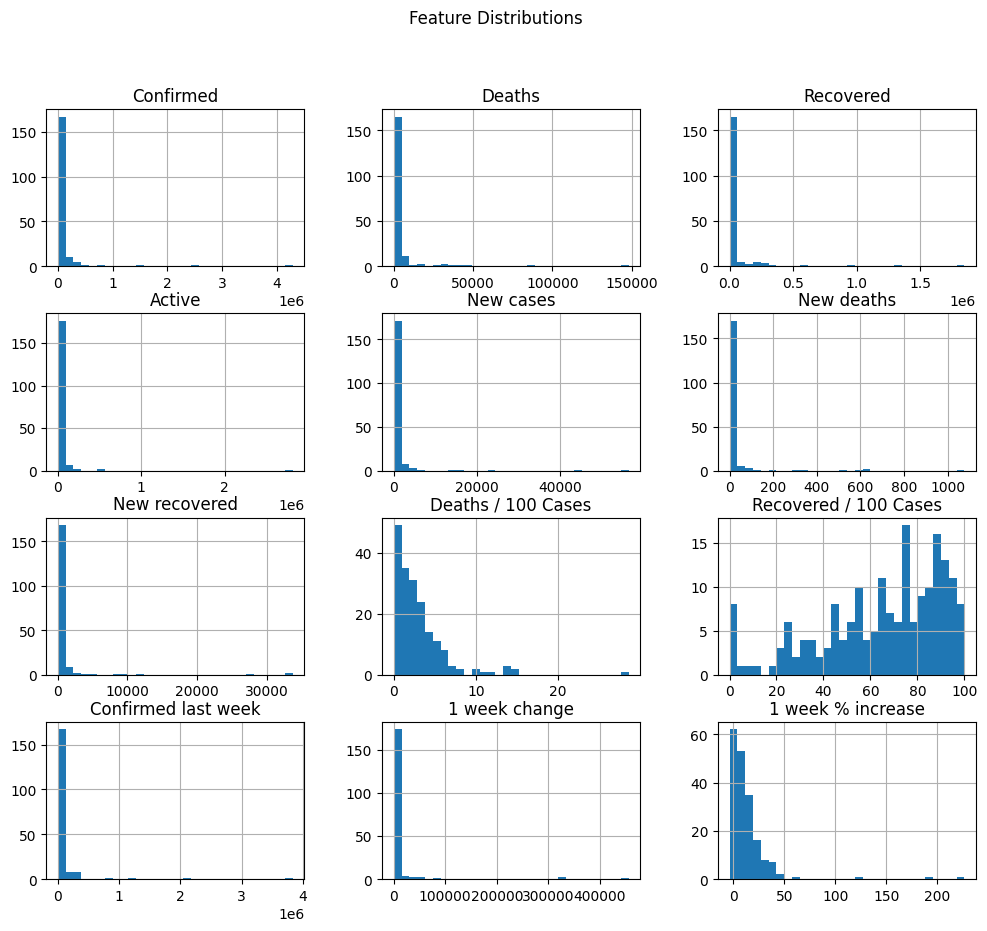

In [15]:
# Histograms (Distribution of each feature)
df_cleaned.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In confirmed cases, the distribution is highly skewed, with most vlaues concentrated at lower case numbers and a long right tail. Similar to this,in other  plots like deaths,active,new cases,new deaths most values are clustered at the lower end indicating a heavy right-skewed.

However, 'Deaths/100 cases' histogram is more evenly spread out compared to other plots.There is gradual decline towards higher mortality rates, suggesting that a few locations have significantly higher death rates(above 10 or even 20 per 100 cases).
The histogram of 'Recovered/100 cases' has a broader spread, meaning recovery rates vary signigicantly between locations.There is a clear peak around 80-100, indicating that many locations have a high recovery rate.

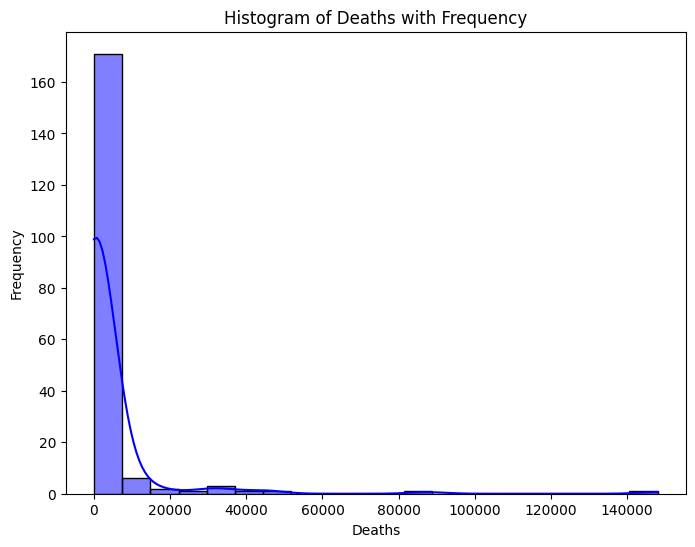

In [16]:
# Plotting the histogram
# Set figure size
plt.figure(figsize=(8,6))

# Plot the histogram for 'Deaths' column with frequency
sns.histplot(df_cleaned['Deaths'], bins=20, kde=True, color='blue')

# Add labels and title
plt.xlabel("Deaths")
plt.ylabel("Frequency")
plt.title("Histogram of Deaths with Frequency")

# Show the plot
plt.show()



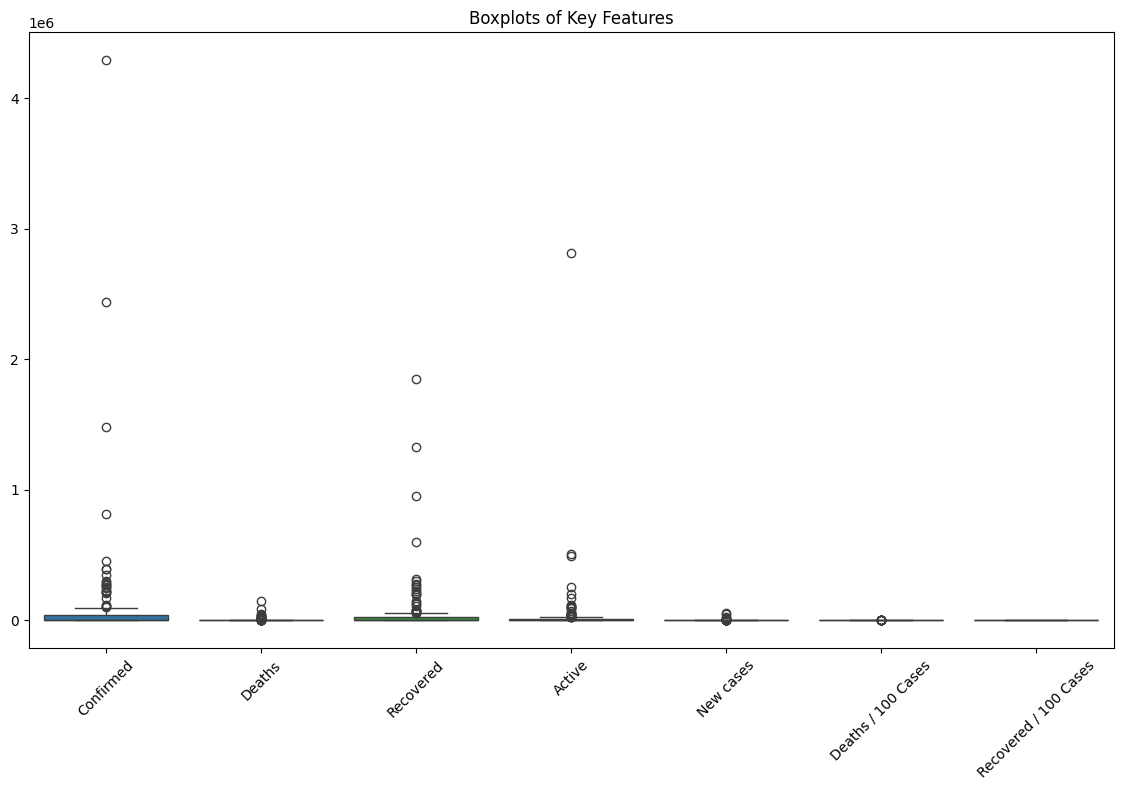

In [17]:
# Boxplots (Check for outliers)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned[["Confirmed", "Deaths", "Recovered", "Active", "New cases", "Deaths / 100 Cases", "Recovered / 100 Cases"]])
plt.xticks(rotation=45)
plt.title("Boxplots of Key Features")
plt.show()

The five columns ["Confirmed", "Deaths", "Recovered", "Active", "New cases"] were chosen for the boxplot because they are the key indicators in COVID-19 data analysis. Each boxplot provides insights into the spread, central tendency, and presence of outliers in the dataset.

This boxplot visualization highlights the unequal distribution of COVID-19 metrics across different regions. The majority of locations have relatively low case counts,deaths, and recoveries, as indicated by the small box sizes. However, there are significant outliers, showing that a few regions experienced exceptionally high numbers.

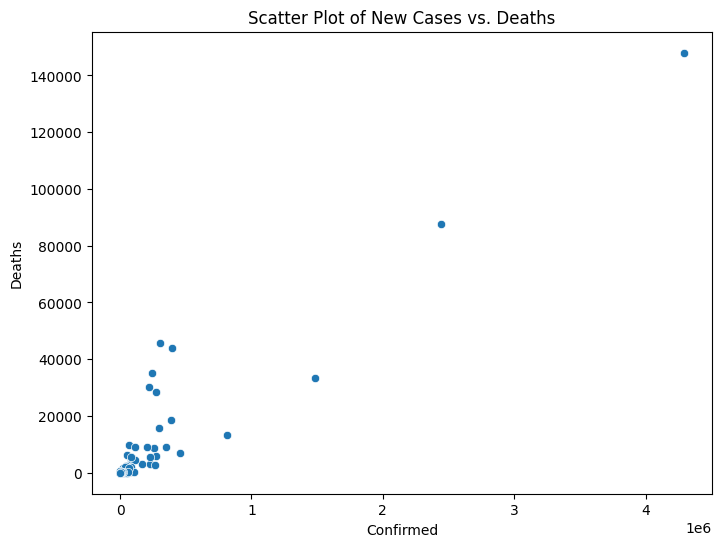

In [18]:

#Bivrate analysis
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cleaned['Confirmed'], y=df_cleaned['Deaths'])
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Scatter Plot of New Cases vs. Deaths")
plt.show()



The scatter plot visually demonstrates the correlation between the number of confirmed cases and the number of deaths.Generally, as the number of confirmed cases increases, the number of deaths also tends to increase. The majority of the data points are clustered near the origin, signifying lower numbers of confirmed cases and deaths. However, a few outliers with higher values suggest instances with significantly more confirmed cases and deaths. By analyzing the pattern of data points, we can gain insights into how the spread of the disease affects mortality.

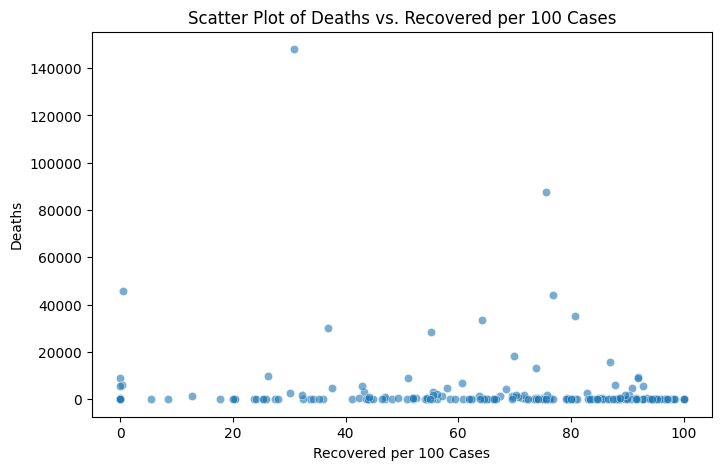

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned['Recovered / 100 Cases'], y=df_cleaned['Deaths'], alpha=0.6)

plt.xlabel("Recovered per 100 Cases")
plt.ylabel("Deaths")
plt.title("Scatter Plot of Deaths vs. Recovered per 100 Cases")
plt.show()

This scatter plot illustrates the relationship between the recovery rate of patients and the total number of deaths. The X-axis represents the number of recovered cases per 100 confirmed cases, indicating the recovery rate, while the Y-axis represents the total number of deaths. Each data point on the plot corresponds to a pair of values for deaths and recovery rates. The majority of data points are clustered near the bottom, suggesting that as the recovery rate increases, the number of deaths remains low. However, there are a few outliers with higher death counts, possibly indicating severe outbreaks or less effective healthcare responses. The plot serves to highlight patterns, such as the general trend of low deaths with higher recovery rates, and identify anomalies, providing insights into healthcare effectiveness in responding to the disease.

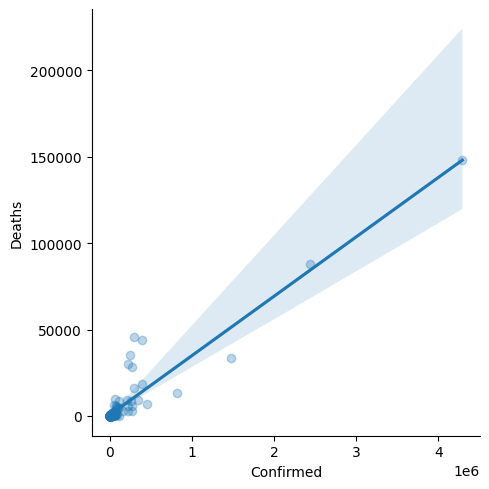

In [20]:
sns.lmplot(x = 'Confirmed', y = 'Deaths', data = df_cleaned, scatter_kws = {'alpha': 0.3})

In this scatter plot, X-axis represents the 'Confirmed' cases and Y-axis 'Deaths' cases. Each point on the plot repesents a pair of confirmed cases and corresponding deaths. Similarly, Regression line indicates a positive correlation between them.

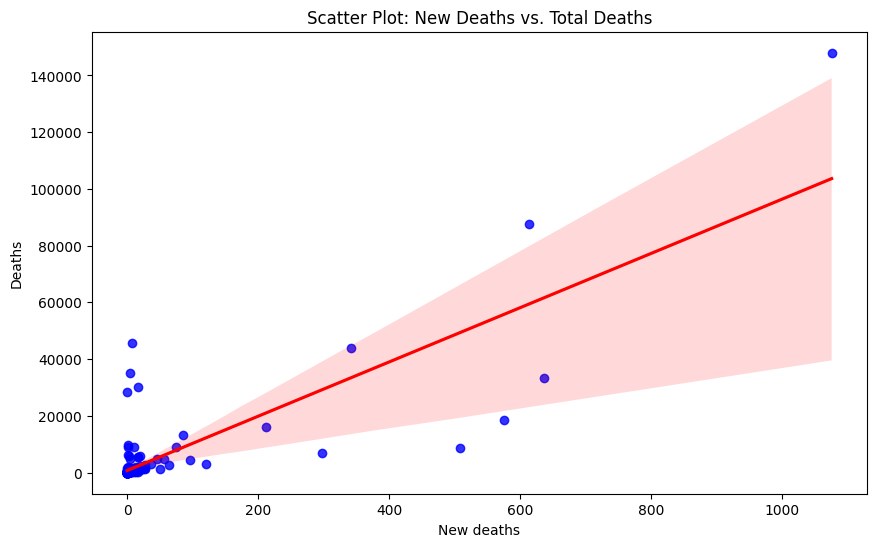

In [21]:


plt.figure(figsize=(10, 6))
sns.regplot(x='New deaths', y='Deaths', data=df_cleaned, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Scatter Plot: New Deaths vs. Total Deaths')
plt.xlabel('New deaths')
plt.ylabel('Deaths')
plt.show()

In [22]:
df['Deaths'].describe()

,Deaths
count,187.000000
mean,3497.518717
std,14100.002482
min,0.000000
25%,18.500000
50%,108.000000
75%,734.000000
max,148011.000000


In [23]:
variance_deaths = np.var(df_cleaned["Deaths"])
print(f"Variance of Deaths: {variance_deaths}")


Variance of Deaths: 197746914.53841975


In [24]:
import numpy as np
import pandas as pd

# Load dataset (Replace 'your_dataset.csv' with actual filename)
data = pd.read_csv("/content/drive/MyDrive/Assesment/country_wise_latest.csv")

# Selecting relevant numerical features (Modify as needed)
X = df_cleaned[['Confirmed last week', 'Confirmed','Deaths','New cases',
                     'Deaths / 100 Cases', 'Recovered / 100 Cases',
                     '1 week % increase']].values
y = df_cleaned["Deaths"].values

# Handle missing values
X = np.where(np.isnan(X), np.nanmean(X, axis=0), X)
y = np.where(np.isnan(y), np.nanmean(y), y)

# Train-test split manually
def train_test_split_manual(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    return X[indices[:split_idx]], X[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y)

# Feature scaling manually (Standardization)
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train, X_mean, X_std = standardize(X_train)
X_test = (X_test - X_mean) / X_std

y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

# Generate polynomial features manually (degree 2)
def polynomial_features(X, degree=2):
    n_samples, n_features = X.shape
    poly_features = [np.ones(n_samples)]  # Bias term

    # Add original features
    for feature in range(n_features):
        poly_features.append(X[:, feature])

    # Add squared terms
    for feature in range(n_features):
        poly_features.append(X[:, feature] ** 2)

    return np.column_stack(poly_features)

X_train_poly = polynomial_features(X_train, degree=2)
X_test_poly = polynomial_features(X_test, degree=2)

# Linear Regression from Scratch with Gradient Descent
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.1, epochs=20000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y

            # Gradient update
            self.weights -= (self.learning_rate / n_samples) * np.dot(X.T, error)

    def predict(self, X):
        return np.dot(X, self.weights)

# Train the model
model = LinearRegressionScratch(learning_rate=0.001, epochs=20000)
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Rescale predictions to original target scale
y_pred_rescaled = y_pred * y_std + y_mean
y_test_rescaled = y_test * y_std + y_mean

# Compute MSE and R² manually
def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mse = mean_squared_error_manual(y_test_rescaled, y_pred_rescaled)
r2 = r2_score_manual(y_test_rescaled, y_pred_rescaled)

# Print results
print(f"Model Performance: MSE = {mse:.4f}, R² = {r2:.4f}")


Model Performance: MSE = 1440686.0324, R² = 0.9354


In [25]:

#Importing necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Regression

In [26]:
# Display dataset info
df_cleaned.info()

# Select relevant columns (Modify as per your dataset)
df_cleaned = df_cleaned[['Confirmed last week', 'Confirmed','Deaths','New cases','Recovered','New recovered',
                     'Deaths / 100 Cases', 'Recovered / 100 Cases',
                     '1 week % increase']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Confirmed              187 non-null    int64  
 1   Deaths                 187 non-null    int64  
 2   Recovered              187 non-null    int64  
 3   Active                 187 non-null    int64  
 4   New cases              187 non-null    int64  
 5   New deaths             187 non-null    int64  
 6   New recovered          187 non-null    int64  
 7   Deaths / 100 Cases     187 non-null    float64
 8   Recovered / 100 Cases  187 non-null    float64
 9   Confirmed last week    187 non-null    int64  
 10  1 week change          187 non-null    int64  
 11  1 week % increase      187 non-null    float64
dtypes: float64(3), int64(9)
memory usage: 17.7 KB


Split the Dataset into Training and Testing Sets

In [27]:
# Define independent (X) and dependent (y) variables
X = df_cleaned[['Confirmed last week', 'Confirmed','Deaths','New cases','Recovered','New recovered',
                     'Deaths / 100 Cases', 'Recovered / 100 Cases',
                     '1 week % increase']]  # Features
y = df_cleaned['Deaths']  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build and Evaluate Two Regression Models

In [28]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# Model 1: Decision Tree Regression
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # You can tune max_depth
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_test, y_pred):
    print(f"{name} Model:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")

# Evaluate both models
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)


Decision Tree Model:
R² Score: 0.8828
Mean Absolute Error (MAE): 992.9720
Root Mean Squared Error (RMSE): 3169.7655

Random Forest Model:
R² Score: 0.8804
Mean Absolute Error (MAE): 1186.8889
Root Mean Squared Error (RMSE): 3201.8297



This code is demonstrating a comparision between two regression models:

1. Decision Tree - a predictive model that uses a tree-like graph or structure to make decisions based on input features. between input and output.
2. Random Forest Regressor - A more advanced ensemble model that captures complex, nonlinear patterns.
The goal is to train both model on a dataset, make prediction on test data and evaluate their performances using metrices like R-squared Score, MAE, RMSE

The R² score measures how well the model explains the variance in the target variable. R-squared shows that both models are performing well(close to 0.88), with the Decision Tress model performing just slightly better.
 MAE is the average of the absolute differences between predicted and actual values.

Both models are performing reasonably well, but if you're looking for the best predictive performance in terms of accuracy and avoiding large errors, the Decision Tree might be the preferable choice in this case. However, these results could vary with further tuning of hyperparameters or different feature sets.











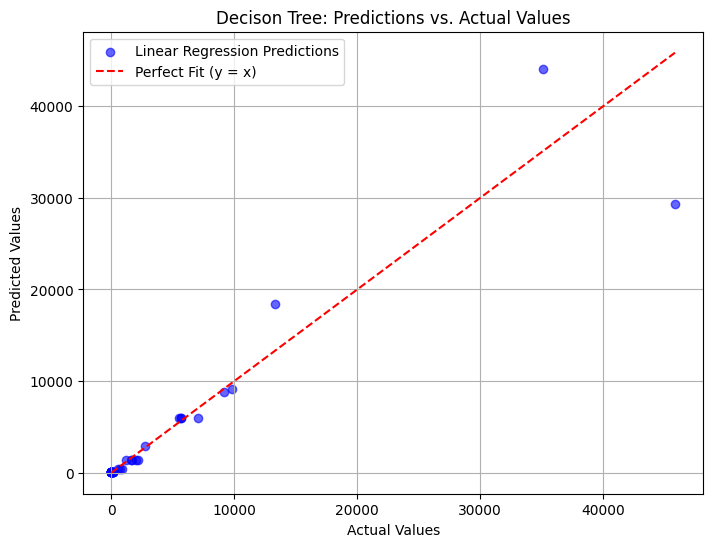

In [29]:
# Scatter plot for Linear Regression predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.6, label="Linear Regression Predictions")

# Plot perfect fit line (y = x)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label="Perfect Fit (y = x)")

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decison Tree: Predictions vs. Actual Values")
plt.legend()
plt.grid(True)
plt.show()

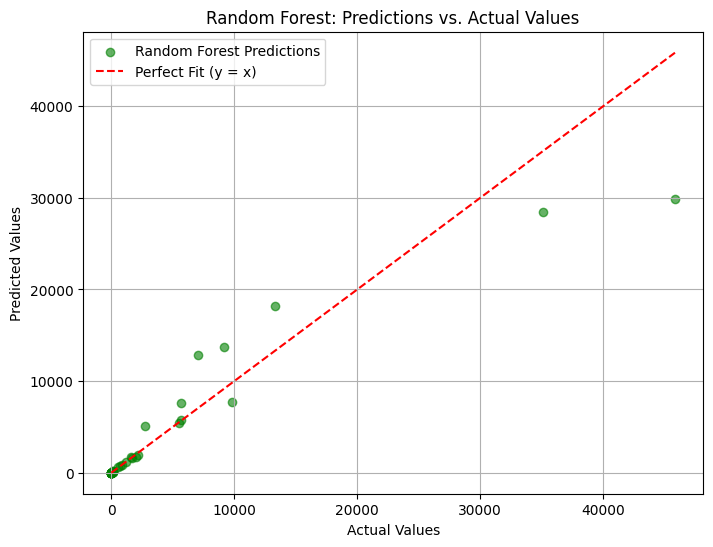

In [30]:
# Scatter plot for Random Forest predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label="Random Forest Predictions")

# Plot perfect fit line (y = x)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label="Perfect Fit (y = x)")

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs. Actual Values")
plt.legend()
plt.grid(True)
plt.show()

**Hyper-parameter Optimization with Cross-validation:**


Identify the various hyper-parameters of the model


In [31]:

# Hyperparameters for Decision Tree Regression
print("Decision Tree Hyperparameters:")
print(dt_model.get_params())


# Hyperparameters for Random Forest
print("\nRandom Forest Hyperparameters:")
print(rf_model.get_params())

Decision Tree Hyperparameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Random Forest Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [32]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Define the parameter grid for Decision Tree
dt_param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

# Set up RandomizedSearchCV with 5-fold cross-validation
dt_random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_param_dist, n_iter=100, cv=5)

# Fit the model to the training data
dt_random_search.fit(X_train, y_train)

# Print the best hyperparameters for Decision Tree
print(f"Best Hyperparameters for Decision Tree: {dt_random_search.best_params_}")


Best Hyperparameters for Decision Tree: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}


In [33]:
# For Random Forest Regressor
rf_model = RandomForestRegressor()
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_dist, n_iter=100, cv=5)
rf_random_search.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print(f"Best Hyperparameters for Random Forest: {rf_random_search.best_params_}")

Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}


In [34]:
from sklearn.feature_selection import SelectFromModel

# Select features using linear regression feature importances
feature_selection = SelectFromModel(dt_model)

# Fit feature selection model
feature_selection.fit(X_train, y_train)

# Transform training and test data with selected features
X_train_feature_selection = feature_selection.transform(X_train)
X_test_feature_selection = feature_selection.transform(X_test)

# Get selected feature indices
selected_indices = feature_selection.get_support(indices=True)

# Get selected feature names
selected_feature_name = X.columns[selected_indices]

print("Selected Feature:", selected_feature_name)

Selected Feature: Index(['Deaths'], dtype='object')


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Train RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Feature selection based on Random Forest
feature_selection = SelectFromModel(rf_model, threshold='mean')
feature_selection.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[feature_selection.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Confirmed', 'Deaths'], dtype='object')


In [36]:

# Ensure `squared=False` is supported
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False) if 'squared' in mean_squared_error.__code__.co_varnames else mean_squared_error(y_true, y_pred) ** 0.5


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train the Decision Tree Regressor model on selected features
dt_model_selected = DecisionTreeRegressor()
dt_model_selected.fit(X_train_feature_selection, y_train)

# Predict on the test set
y_pred_dt = dt_model_selected.predict(X_test_feature_selection)

# Evaluate performance for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = calculate_rmse(y_test, y_pred_dt)  # Handles compatibility

print("Decision Tree Performance with Selected Features:")
print(f"R²: {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")



Decision Tree Performance with Selected Features:
R²: 0.9956
Mean Absolute Error (MAE): 238.4211
Root Mean Squared Error (RMSE): 616.4596


In [37]:
# Train the Random Forest model on selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_feature_selection, y_train)

# Predict on the test set
y_pred_rf = rf_model_selected.predict(X_test_feature_selection)

# Evaluate performance for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = calculate_rmse(y_test, y_pred_rf)  # Handles compatibility

print("\nRandom Forest Performance with Selected Features:")
print(f"R²: {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")






Random Forest Performance with Selected Features:
R²: 0.9866
Mean Absolute Error (MAE): 297.6237
Root Mean Squared Error (RMSE): 1073.2054


**Conclusion:**

* Model Performance: The Decision Tree and Random Forest models were evaluated based on key metrics such as R2 score, MAE, and RMSE. Initially both the model has similar performances. After applying feature selection, both models significantly improved,  indicating that feature selection helped enhance model performance, particularly for the Decision Tree model.

* Impact of Methods:
Several techniques were applied to improve model performance, including Hyperparameter Tuning (RandomizedSearchCV) and Feature Selection (SelectFromModel). The hyperparameter tuning helped optimize model parameters, leading to more stable and improved predictions. Feature selection was particularly beneficial, as it removed less important variables, leading to better generalization and reducing overfitting. The Decision Tree model showed a significant improvement after feature selection, achieving a much higher R² score and lower error metrics. In contrast, the Random Forest model showed moderate improvement, suggesting that it was already performing well with the full feature set.

* Insights and Future Directions:
This experiment demonstrated the importance of feature selection and hyperparameter tuning in enhancing predictive performance. The Decision Tree model benefited more from feature selection compared to the Random Forest model, indicating that tree-based models can be sensitive to irrelevant features. Future improvements could include ensemble learning techniques, such as stacking models, or experimenting with gradient boosting algorithms like XGBoost or LightGBM, which may provide further performance gains. Additionally, testing different feature selection techniques and increasing the dataset size could help improve model robustness and generalizability.

Overall, the study demonstrated that applying feature selection and cross-validation can significantly enhance predictive accuracy, with the Decision Tree model outperforming Random Forest when optimized properly.


